### The success of the adaptations

In this notebook, we will analyze the success of the adaptations themselves: are they more successful than non-adaptations? Is there a correlation between the success of a book and of its adaptation? This success can both be represented in terms of box-office, rating and engagement (number of reviews).

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scripts.category_analysis import *
from scipy import stats

In [51]:
# Load the dataset adapted_movies
adapted_movies = pd.read_csv('../data/adapted_movies.csv')
adapted_movies.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,"Silent film, Black-and-white",L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,"History, Silent film, Drama",Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
2,1090641,Atlantis,1913,NaN,113.0,"English Language, Danish Language",Denmark,"Silent film, Drama, Indie, Black-and-white",Gerhart Hauptmann,Atlantis,1912.0,1912,NaN,NaN,NaN,NaN,6.5,502,"Dr. Friedrich von Kammacher , a surgeon, is de..."
3,22521524,Ivanhoe,1913,NaN,NaN,"Silent film, English Language",United States of America,"Swashbuckler films, Silent film, Drama, Adventure",Sir Walter Scott,Ivanhoe,1820.0,1820,NaN,NaN,NaN,NaN,5.6,98,"Set in late 12th century England, this silent ..."
4,18979350,Cinderella,1914,NaN,52.0,"Silent film, English Language",United States of America,"Silent film, Fantasy, Black-and-white",Charles Perrault,Cinderella,1697.0,1697,The former Well Loved Tales series have been r...,3.97,1937.0,eng,6.0,1100,Cinderella is a winsome young girl who lives w...


In [52]:
# Explode the MovieGenre column
adapted_movies_exploded = explode_MovieGenre(adapted_movies.copy())
adapted_movies_exploded.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,BookStartYear,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Silent film,L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Black-and-white,L. Frank Baum,The Wonderful Wizard of Oz,1900.0,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,History,Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Silent film,Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN
1,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Drama,Margaret George,The Memoirs of Cleopatra,1997.0,1997,NaN,4.18,17986.0,eng,5.1,636,NaN


In [53]:
# Load the inflation data
inflation_data = pd.read_csv('../data/dollar_inflation.csv')

# Merge the inflation data with the dataframe
adapted_movies = pd.merge(adapted_movies, inflation_data, left_on='MovieYear', right_on='year')
adapted_movies_exploded = pd.merge(adapted_movies_exploded, inflation_data, left_on='MovieYear', right_on='year')

# Calculate the adjusted box office
adapted_movies['MovieAdjustedBoxOffice'] = adapted_movies['MovieBoxOffice'] / adapted_movies['inflation']
adapted_movies_exploded['MovieAdjustedBoxOffice'] = adapted_movies_exploded['MovieBoxOffice'] / adapted_movies_exploded['inflation']

# Drop the year and inflation columns
adapted_movies = adapted_movies.drop(columns=['year', 'inflation'])
adapted_movies_exploded = adapted_movies_exploded.drop(columns=['year', 'inflation'])

# Display the updated dataframe
print(adapted_movies.head())
print(adapted_movies_exploded.head())

   wikipedia_id                       MovieName  MovieYear  MovieBoxOffice  \
0       5954041  The Fairylogue and Radio-Plays       1908             NaN   
1      19236804                       Cleopatra       1912             NaN   
2       1090641                        Atlantis       1913             NaN   
3      22521524                         Ivanhoe       1913             NaN   
4      18979350                      Cinderella       1914             NaN   

   MovieRuntime                      MovieLanguage            MovieCountries  \
0         120.0                   English Language  United States of America   
1          88.0                   English Language  United States of America   
2         113.0  English Language, Danish Language                   Denmark   
3           NaN      Silent film, English Language  United States of America   
4          52.0      Silent film, English Language  United States of America   

                                          MovieGen

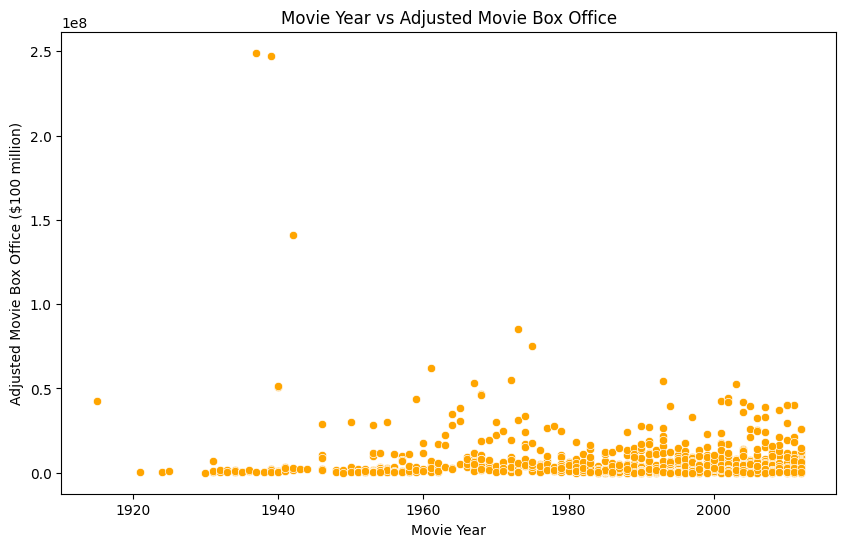

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieYear', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Movie Year vs Adjusted Movie Box Office')
plt.xlabel('Movie Year')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

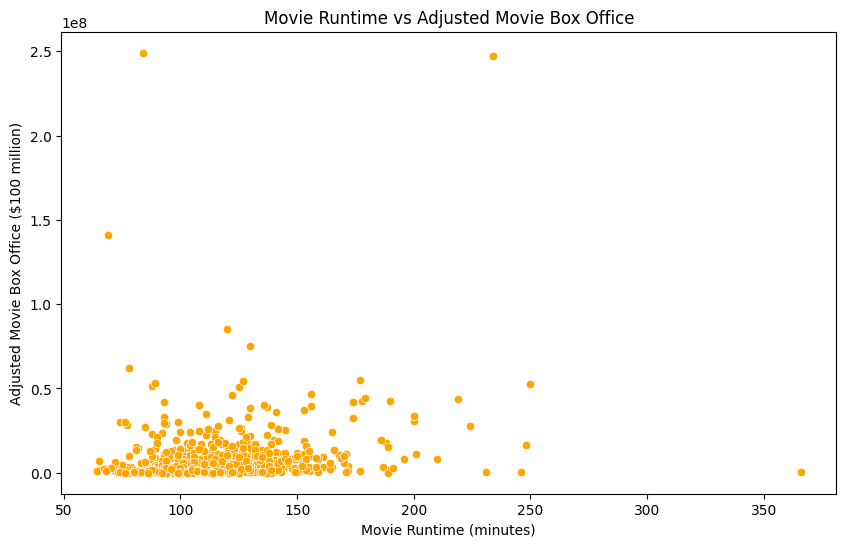

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRuntime', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Movie Runtime vs Adjusted Movie Box Office')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

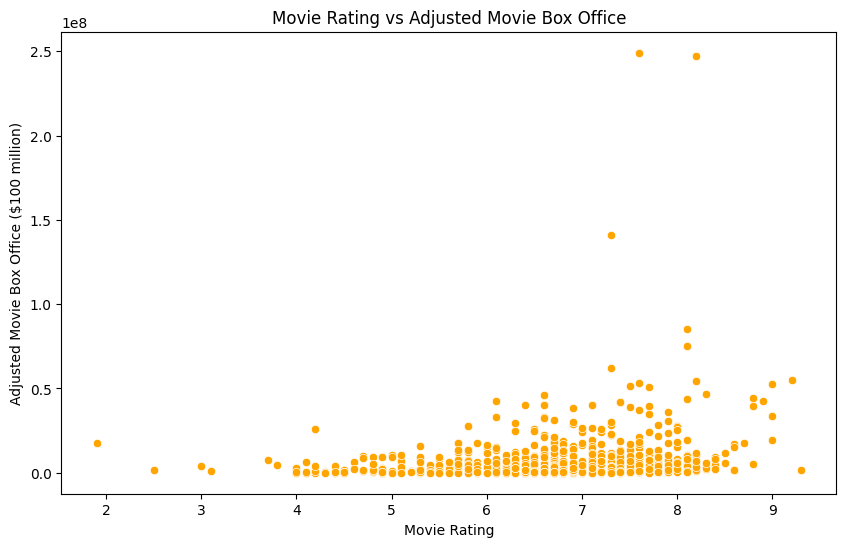

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRating', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Movie Rating vs Adjusted Movie Box Office')
plt.xlabel('Movie Rating')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

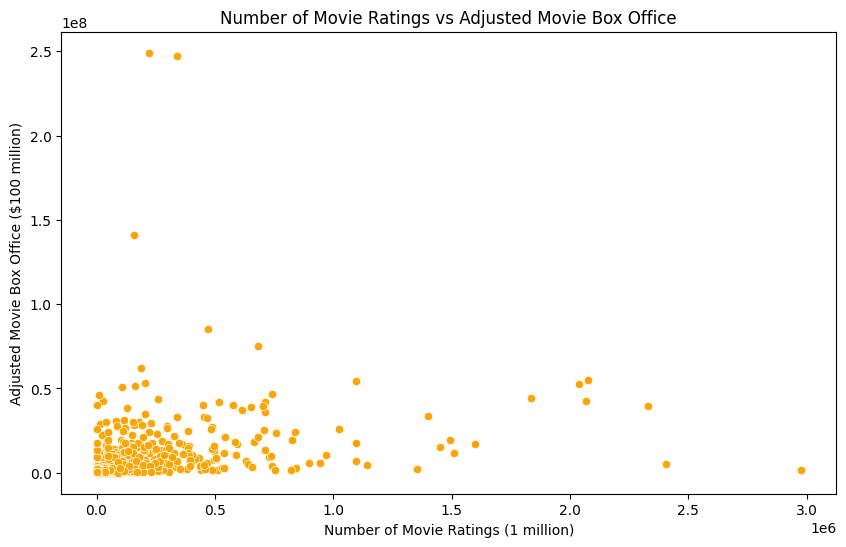

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRatingNb', y='MovieAdjustedBoxOffice', color='orange')
plt.title('Number of Movie Ratings vs Adjusted Movie Box Office')
plt.xlabel('Number of Movie Ratings (1 million)')
plt.ylabel('Adjusted Movie Box Office ($100 million)')
plt.show()

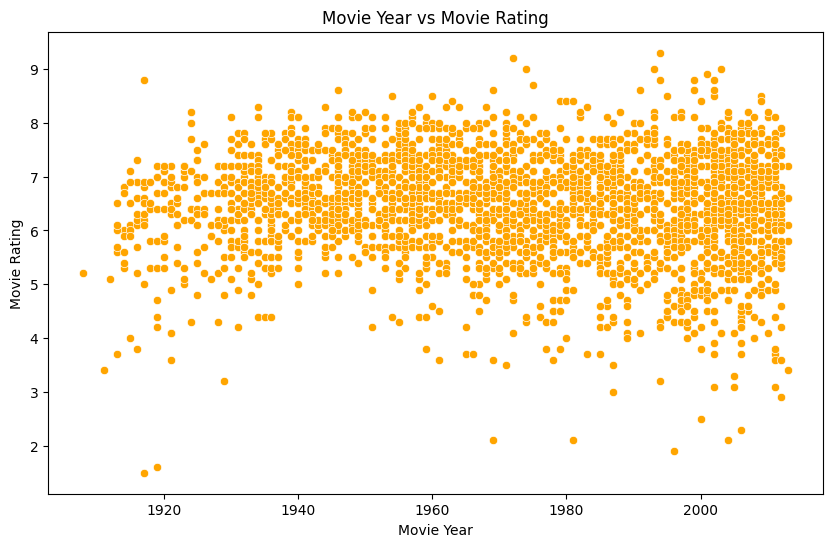

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieYear', y='MovieRating', color='orange')
plt.title('Movie Year vs Movie Rating')
plt.xlabel('Movie Year')
plt.ylabel('Movie Rating')
plt.show()

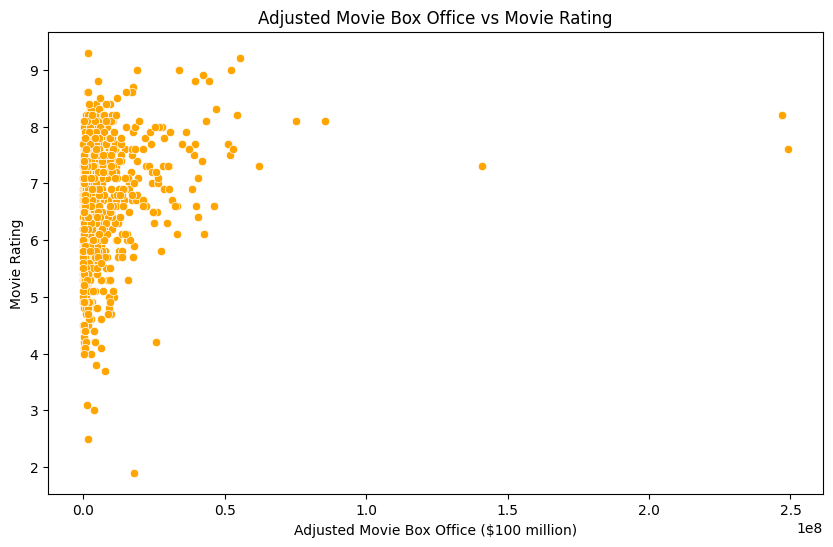

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieAdjustedBoxOffice', y='MovieRating', color='orange')
plt.title('Adjusted Movie Box Office vs Movie Rating')
plt.xlabel('Adjusted Movie Box Office ($100 million)')
plt.ylabel('Movie Rating')
plt.show()

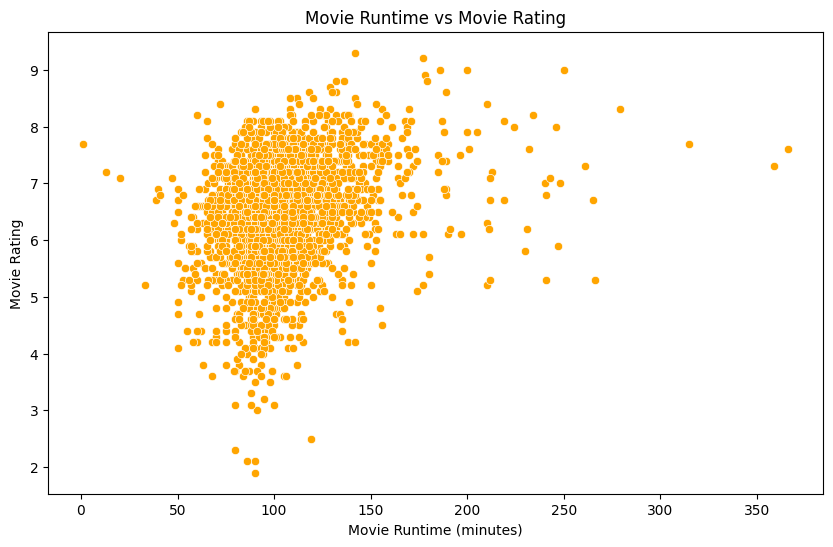

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRuntime', y='MovieRating', color='orange')
plt.title('Movie Runtime vs Movie Rating')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Movie Rating')
plt.show()

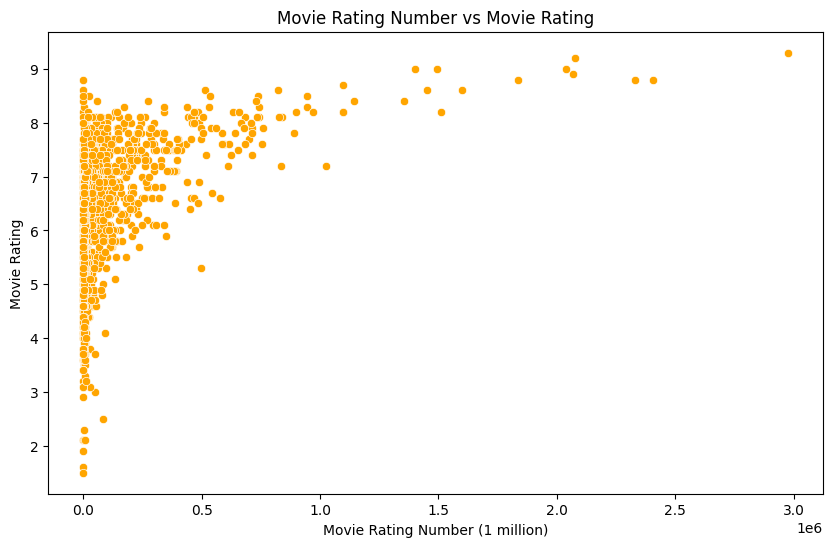

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='MovieRatingNb', y='MovieRating', color='orange')
plt.title('Movie Rating Number vs Movie Rating')
plt.xlabel('Movie Rating Number (1 million)')
plt.ylabel('Movie Rating')
plt.show()

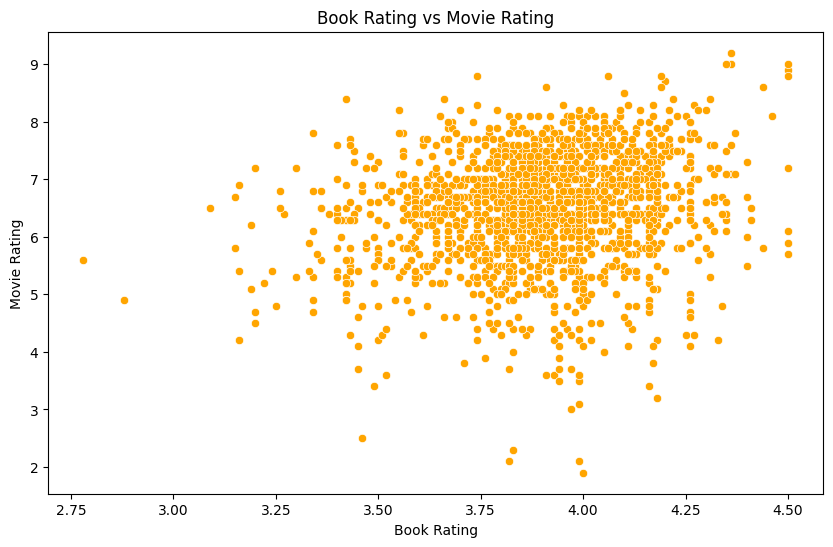

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adapted_movies, x='BookRating', y='MovieRating', color='orange')
plt.title('Book Rating vs Movie Rating')
plt.xlabel('Book Rating')
plt.ylabel('Movie Rating')
plt.show()

In [63]:
all_movies = pd.read_csv('../data/all_movies.csv')
non_adapted_movies = all_movies[~all_movies['wikipedia_id'].isin(adapted_movies['wikipedia_id'])]

In [64]:
genre_categories = load_genre_categories('../data/genre_categories.json')

adapted_movies_exploded['MovieCategory'] = adapted_movies_exploded['MovieGenre'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

adapted_movies_exploded.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,BookAuthor,BookTitle,...,BookEndYear,BookDescription,BookRating,BookRatingNb,BookLanguage,MovieRating,MovieRatingNb,MoviePlot,MovieAdjustedBoxOffice,MovieCategory
0,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Silent film,L. Frank Baum,The Wonderful Wizard of Oz,...,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN,NaN,Classic & Silent
1,5954041,The Fairylogue and Radio-Plays,1908,NaN,120.0,English Language,United States of America,Black-and-white,L. Frank Baum,The Wonderful Wizard of Oz,...,1900,NaN,3.99,348112.0,NaN,5.2,78,NaN,NaN,Classic & Silent
2,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,History,Margaret George,The Memoirs of Cleopatra,...,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,NaN,Historical & Period
3,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Silent film,Margaret George,The Memoirs of Cleopatra,...,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,NaN,Classic & Silent
4,19236804,Cleopatra,1912,NaN,88.0,English Language,United States of America,Drama,Margaret George,The Memoirs of Cleopatra,...,1997,NaN,4.18,17986.0,eng,5.1,636,NaN,NaN,Drama


Correlation Adjusted Box Office - Runtime

In [65]:
adapted_movies_adjustedboxoffice_runtime = adapted_movies_exploded.copy()
adapted_movies_adjustedboxoffice_runtime = adapted_movies_adjustedboxoffice_runtime.dropna(subset=['MovieAdjustedBoxOffice', 'MovieRuntime'])
pearson_adjustedboxoffice_runtime = stats.pearsonr(adapted_movies_adjustedboxoffice_runtime['MovieAdjustedBoxOffice'], adapted_movies_adjustedboxoffice_runtime['MovieRuntime'])
spearman_adjustedboxoffice_runtime = stats.spearmanr(adapted_movies_adjustedboxoffice_runtime['MovieAdjustedBoxOffice'], adapted_movies_adjustedboxoffice_runtime['MovieRuntime'])


print(pearson_adjustedboxoffice_runtime)
print(spearman_adjustedboxoffice_runtime)

PearsonRResult(statistic=0.23012061195261813, pvalue=1.1523505560273856e-73)
SignificanceResult(statistic=0.3106038050495514, pvalue=1.09396908507245e-135)


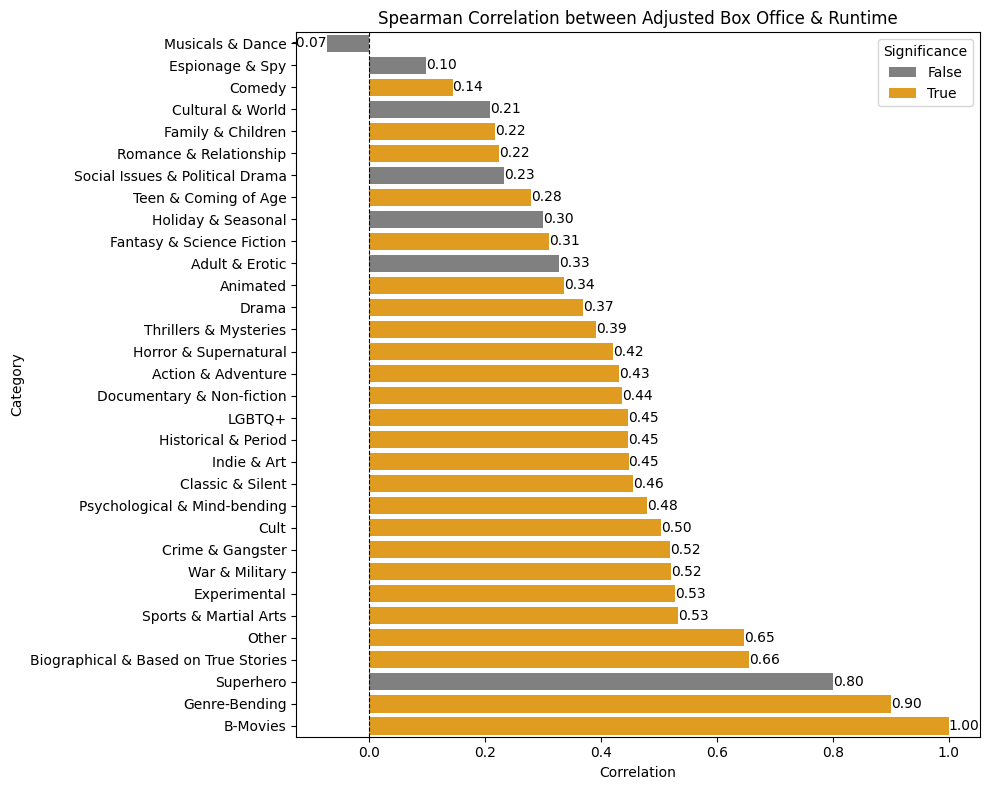

In [66]:
corr_adjustedboxoffice_runtime = category_correlation('spearman', adapted_movies_adjustedboxoffice_runtime, 'MovieAdjustedBoxOffice', 'MovieRuntime')
plot_category_correlation(corr_adjustedboxoffice_runtime, 'Spearman Correlation between Adjusted Box Office & Runtime')

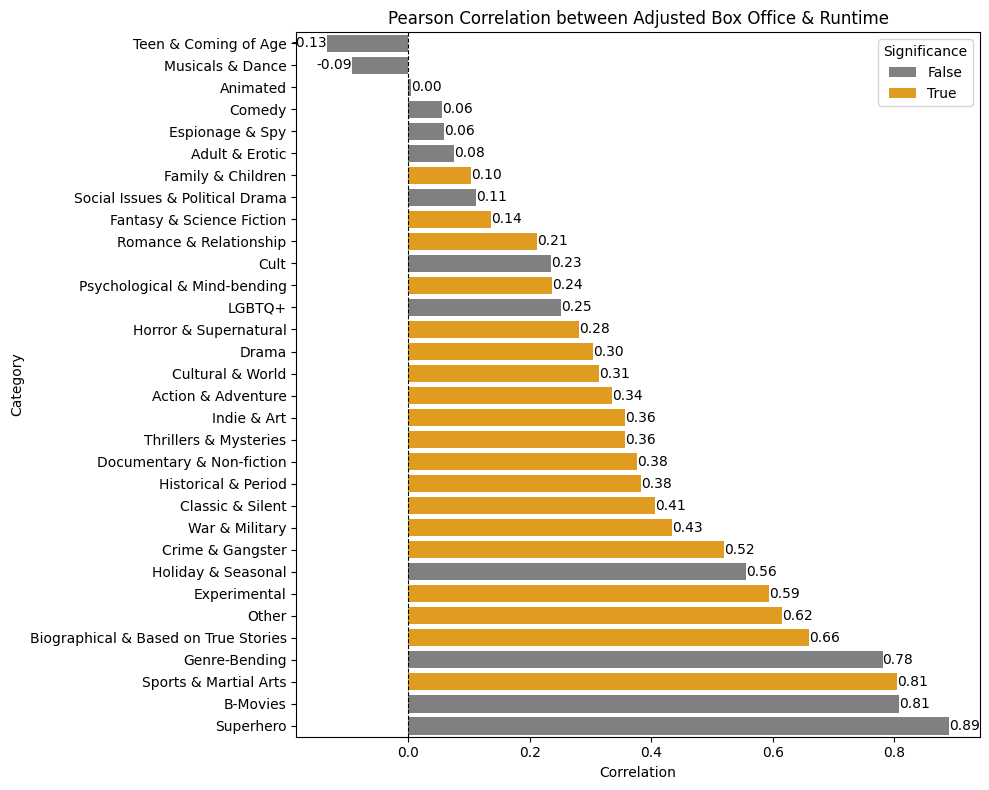

In [67]:
corr_adjustedboxoffice_runtime = category_correlation('pearson', adapted_movies_adjustedboxoffice_runtime, 'MovieAdjustedBoxOffice', 'MovieRuntime')
plot_category_correlation(corr_adjustedboxoffice_runtime, 'Pearson Correlation between Adjusted Box Office & Runtime')

Adjusted Box-Office Comparison between Adaptations and Non-Adaptations

In [68]:
# Load the dataset all_movies that are not adapted from book
all_movies = pd.read_csv('../data/all_movies.csv')
non_adapted_movies = all_movies[~all_movies['wikipedia_id'].isin(adapted_movies['wikipedia_id'])]

# Explode the MovieGenre column
non_adapted_movies_exploded = explode_MovieGenre(non_adapted_movies.copy())

# Merge the inflation data with the dataframe
non_adapted_movies_exploded = pd.merge(non_adapted_movies_exploded, inflation_data, left_on='MovieYear', right_on='year')

# Calculate the adjusted box office
non_adapted_movies_exploded['MovieAdjustedBoxOffice'] = non_adapted_movies_exploded['MovieBoxOffice'] / non_adapted_movies_exploded['inflation']

# Drop the year and inflation columns
non_adapted_movies_exploded = non_adapted_movies_exploded.drop(columns=['year', 'inflation'])

# Display the updated dataframe
non_adapted_movies_exploded.head()

,wikipedia_id,MovieName,MovieYear,MovieBoxOffice,MovieRuntime,MovieLanguage,MovieCountries,MovieGenre,MovieRating,MovieRatingNb,MoviePlot,MovieAdjustedBoxOffice
0,10109752,Miss Jerry,1894,NaN,NaN,Silent film,United States of America,Short Film,5.4,215,After finding out that her father is suffering...,NaN
1,10109752,Miss Jerry,1894,NaN,NaN,Silent film,United States of America,Silent film,5.4,215,After finding out that her father is suffering...,NaN
2,10109752,Miss Jerry,1894,NaN,NaN,Silent film,United States of America,Indie,5.4,215,After finding out that her father is suffering...,NaN
3,10109752,Miss Jerry,1894,NaN,NaN,Silent film,United States of America,Black-and-white,5.4,215,After finding out that her father is suffering...,NaN
4,28703057,The Corbett-Fitzsimmons Fight,1897,100000.0,NaN,NaN,NaN,Sports,5.2,541,The film no longer exists in its entirety; how...,103092.783505


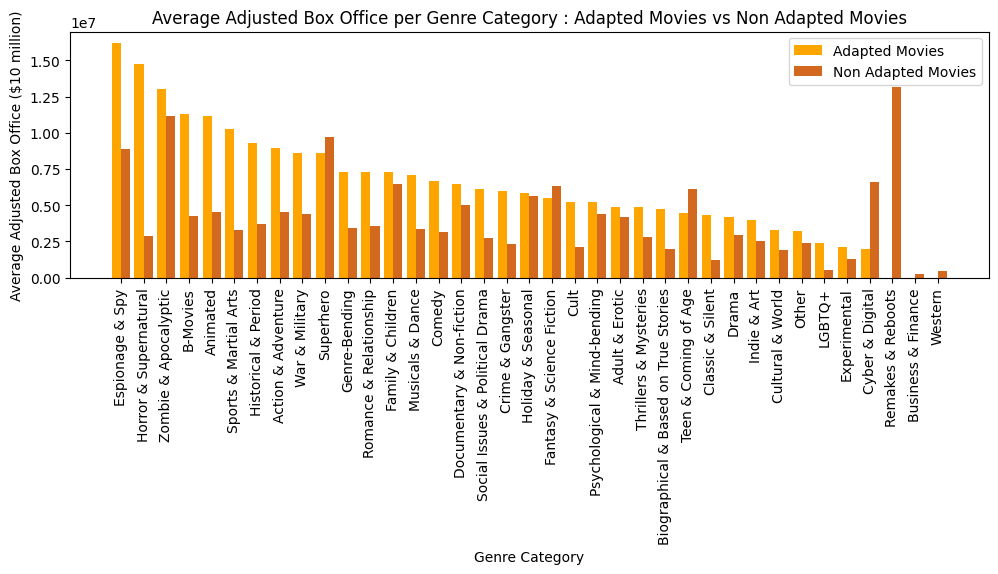

In [69]:
# Calculate the average adjusted box office for each genre category
adapted_movies_average_adjusted_box_office = adapted_movies_exploded.dropna(subset=['MovieAdjustedBoxOffice']).groupby('MovieGenre')['MovieAdjustedBoxOffice'].mean()
non_adapted_movies_average_adjusted_box_office = non_adapted_movies_exploded.dropna(subset=['MovieAdjustedBoxOffice']).groupby('MovieGenre')['MovieAdjustedBoxOffice'].mean()

# Map genres to categories
adapted_movies_average_adjusted_box_office_category = adapted_movies_average_adjusted_box_office.reset_index()
adapted_movies_average_adjusted_box_office_category['MovieCategory'] = adapted_movies_average_adjusted_box_office_category['MovieGenre'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))
non_adapted_movies_average_adjusted_box_office_category = non_adapted_movies_average_adjusted_box_office.reset_index()
non_adapted_movies_average_adjusted_box_office_category['MovieCategory'] = non_adapted_movies_average_adjusted_box_office_category['MovieGenre'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other'))

# Calculate the average adjusted box office for each category
adapted_movies_average_adjusted_box_office_category = adapted_movies_average_adjusted_box_office_category.groupby('MovieCategory')['MovieAdjustedBoxOffice'].mean()
non_adapted_movies_average_adjusted_box_office_category = non_adapted_movies_average_adjusted_box_office_category.groupby('MovieCategory')['MovieAdjustedBoxOffice'].mean()

# Ensure all categories are present
all_categories = list(genre_categories.keys())
adapted_movies_average_adjusted_box_office_category = adapted_movies_average_adjusted_box_office_category.reindex(all_categories, fill_value=0)
non_adapted_movies_average_adjusted_box_office_category = non_adapted_movies_average_adjusted_box_office_category.reindex(all_categories, fill_value=0)

# Combine the data
non_vs_adaptation_categories = pd.merge(non_adapted_movies_average_adjusted_box_office_category, adapted_movies_average_adjusted_box_office_category, left_index=True, right_index=True)
non_vs_adaptation_categories.columns = ['Non-Adaptation', 'Adaptation']

# Plot the average adjusted box office for each genre category
index = range(len(non_vs_adaptation_categories))
bar_width = 0.4
plt.figure(figsize=(10, 6))

non_vs_adaptation_categories = non_vs_adaptation_categories.sort_values(by='Adaptation', ascending=False)

plt.bar(index, non_vs_adaptation_categories['Adaptation'], width=bar_width, label='Adapted Movies', color='orange')
plt.bar([i + bar_width for i in index], non_vs_adaptation_categories['Non-Adaptation'], width=bar_width, label='Non Adapted Movies', color='chocolate')

plt.xlabel('Genre Category')
plt.ylabel('Average Adjusted Box Office ($10 million)')
plt.title('Average Adjusted Box Office per Genre Category : Adapted Movies vs Non Adapted Movies')
plt.xticks([i + bar_width / 2 for i in index], non_vs_adaptation_categories.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()